# Penyeimbangan dataset (SMOTE, ADASYN)

## Download data, simpan di MYSQL

Gambar tersebut menjelaskan sebuah repositori yang menyimpan dataset tentang lokasi protein. Halaman web-nya menampilkan ringkasan data, termasuk karakteristiknya sebagai dataset multivariate di bidang biologi yang cocok untuk tugas klasifikasi. Dataset ini berisi 336 data dengan 7 atribut dan tidak ada data yang hilang.

Untuk mengunduhnya, kita bisa menekan tombol DOWNLOAD (5.5 KB) di sisi kanan halaman, dan file akan terunduh dalam format teks atau CSV, siap untuk digunakan dalam analisis atau pemodelan machine learning.

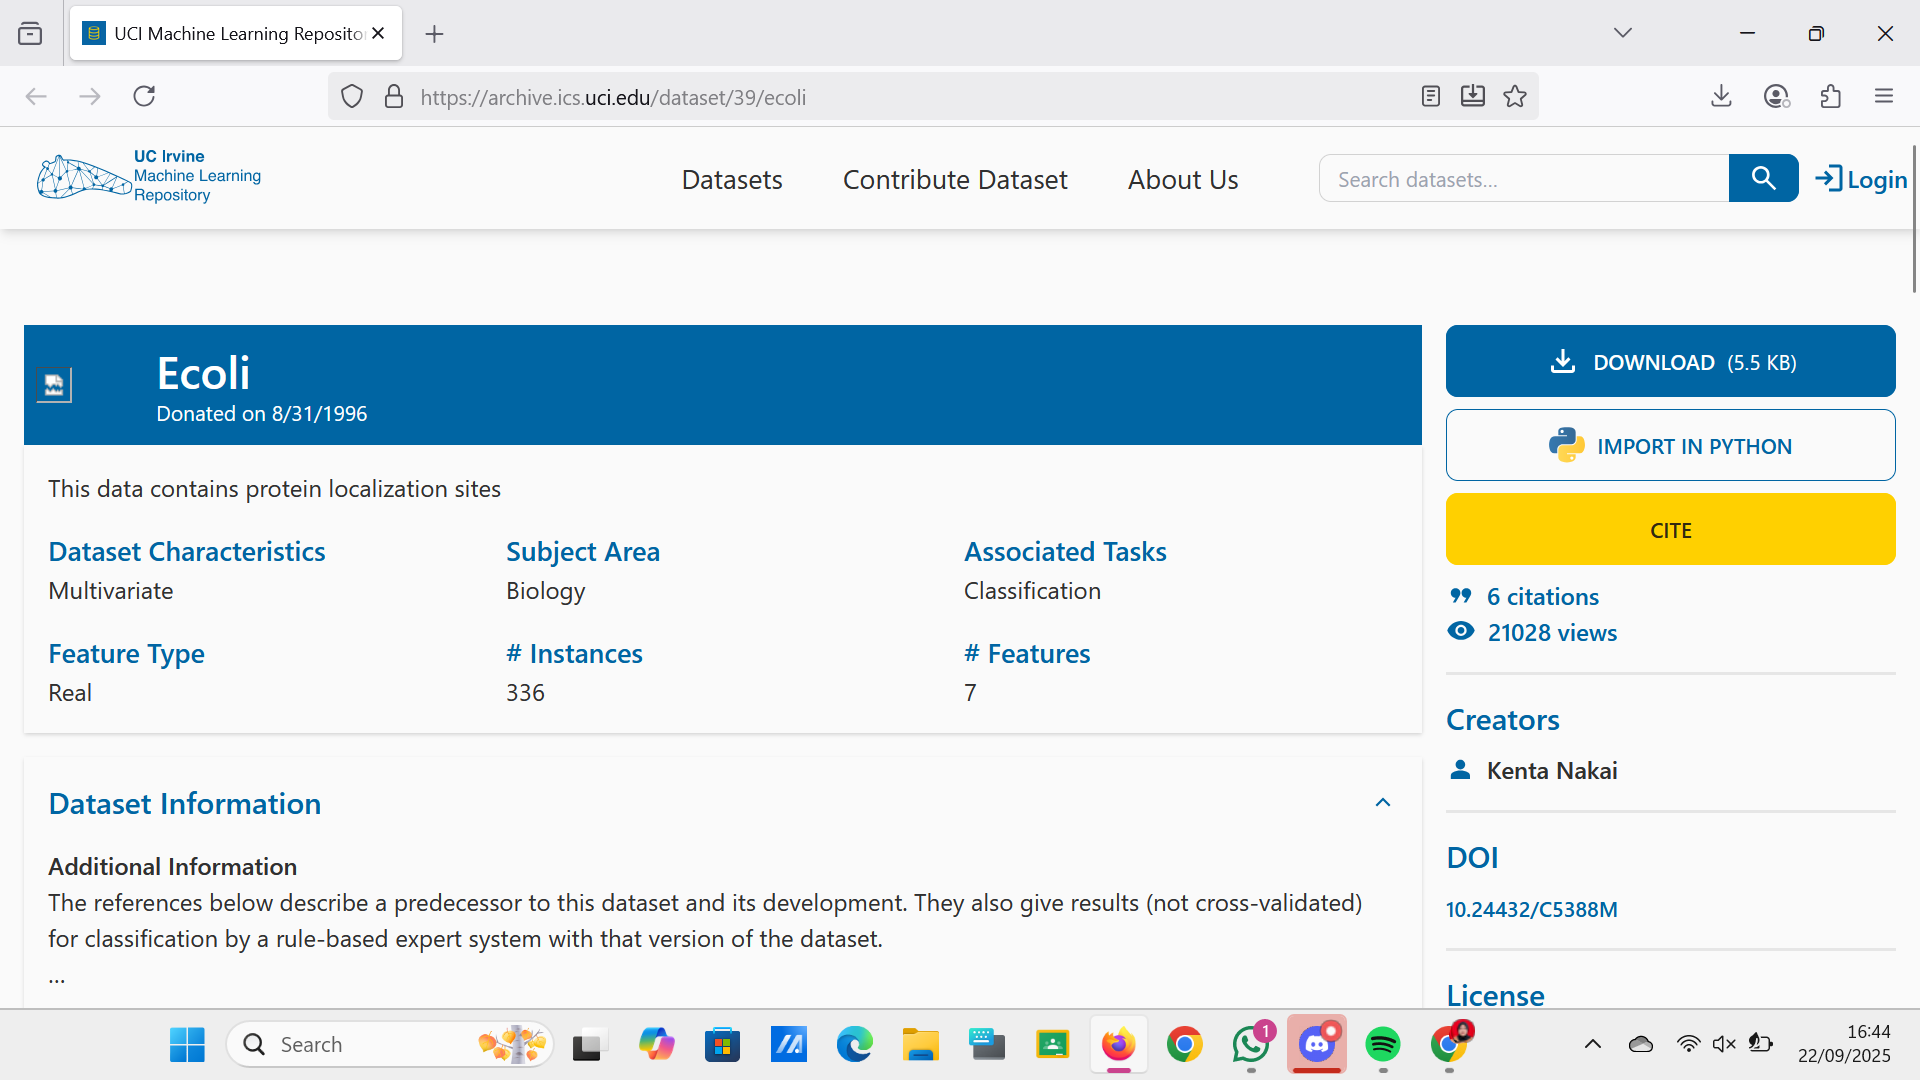

Gambar di bawah ini menunjukkan antarmuka phpMyAdmin saat melakukan import dataset Ecoli yang berformat .sql ke dalam MySQL. Setelah mengunduh dataset dari UCI Repository, langkah selanjutnya adalah mengimpor file tersebut agar dapat disimpan dan dikelola di database MySQL. Berikut adalah langkah-langkahnya:

- Masuk ke phpMyAdmin → pilih database yang akan digunakan (contohnya ecoli_dataset).

- Klik pada menu Impor.

- Pada bagian Berkas untuk impor, klik Pilih Berkas dan pilih file ecoli_dataset .sql yang telah diunduh.

- Pastikan bahwa Set karakter berkas disetel ke utf-8 agar data dapat terbaca dengan baik.

- Pada pilihan Format, pilih sql.

- scroll ke bawah dan tekan tombol Go untuk memulai proses impor.

Setelah itu, MySQL akan membuat tabel yang berisi data dari file .sql tersebut.

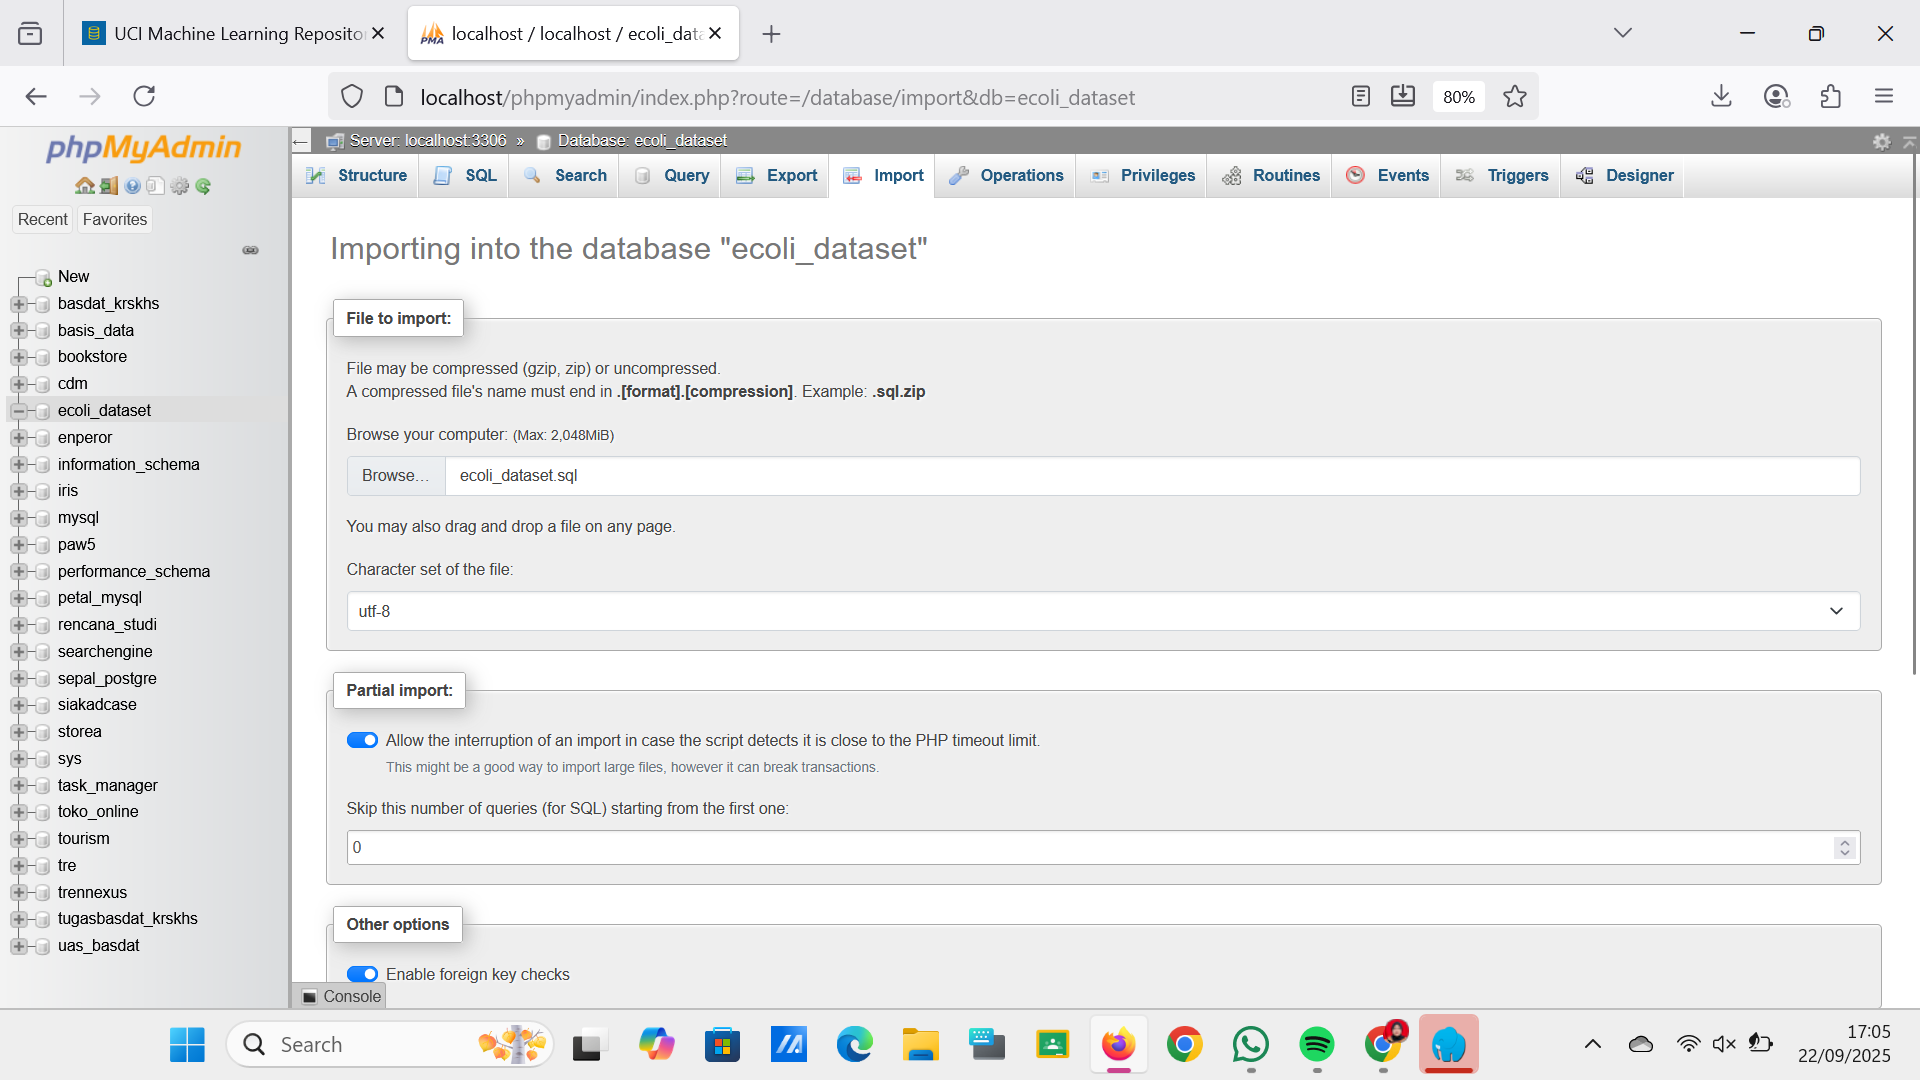

## Installing library

In [ ]:
pip install mysql-connector-python imbalanced-learn scikit-learn matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 52.4 MB/s eta 0:00:00


## Menghubungkan dan menginisialisasi dataset awal

Kode Python berikut ini bertujuan untuk mengambil dataset Ecoli dari UCI Machine Learning Repository dan menyimpannya dalam bentuk DataFrame dengan menggunakan pustaka pandas. Pada bagian awal, semua perpustakaan yang diperlukan dimuat, termasuk pandas, numpy, matplotlib, seaborn, serta modul-modul dari scikit-learn (StandardScaler, PCA), dan ADASYN dari imbalanced-learn untuk menyeimbangkan data. Selain itu, sqlalchemy juga disertakan untuk keperluan koneksi ke database MySQL. Variabel konfigurasi untuk database seperti MYSQL_USER, MYSQL_PASS, MYSQL_HOST, MYSQL_PORT, dan MYSQL_DB telah ditetapkan sehingga memudahkan penyimpanan data ke MySQL.

Selanjutnya, bagian ini mendefinisikan URL untuk dataset (ecoli. data) dan daftar nama kolom mengacu pada dokumentasi UCI, yaitu atribut seperti mcg, gvh, lip, chg, aac, alm1, alm2, serta class sebagai label kelasnya. Dataset kemudian diimpor dengan menggunakan pd. read_csv() dengan parameter sep=r"\s+" karena data dipisahkan oleh spasi/tab. Hasil dari proses pembacaan disimpan di dalam DataFrame bernama df, lalu ditampilkan ukuran data dengan df. shape dan lima baris pertama menggunakan df. head(). Tahap ini adalah langkah awal untuk memastikan bahwa data telah berhasil diunduh dan terbaca dengan baik sebelum melanjutkan ke analisis lebih lanjut seperti PCA, visualisasi, atau penyeimbangan data melalui ADASYN.

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import ADASYN
from sqlalchemy import create_engine


MYSQL_USER = "root"
MYSQL_PASS = ""
MYSQL_HOST = "127.0.0.1"
MYSQL_PORT = 3306
MYSQL_DB   = "ecoli_dataset"
TABLE_NAME = "ecoli_dataset"

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data"

col_names = ["seq_name", "mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2", "class"]

df = pd.read_csv(url, header=None, sep=r"\s+", names=col_names)
print("Shape:", df.shape)
print(df.head())


Shape: (336, 9)
     seq_name   mcg   gvh   lip  chg   aac  alm1  alm2 class
0   AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35    cp
1  ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44    cp
2  ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46    cp
3  ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36    cp
4   ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35    cp


## Visualisasi Data dengan PCA

Kode yang ditampilkan di bawah bertujuan untuk menjelajahi dan memvisualisasikan dataset Ecoli melalui dua metode. Pertama, dibuatlah grafik pareto dengan seaborn yang menggambarkan beberapa fitur numerik utama (mcg, gvh, lip, chg, aac, alm1, alm2) dengan kelas sebagai pembeda warna. Grafik ini menunjukkan distribusi marginal setiap fitur di bagian diagonal, serta hubungan dan penyebaran antar fitur pada grafik sebar di luar diagonal. Visualisasi ini berfungsi untuk memahami pola awal, hubungan antar fitur, dan bagaimana distribusi kelas-kelas Ecoli dalam ruang fitur asli sebelum dilakukan pengurangan dimensi.

Selanjutnya, data dinormalisasi menggunakan StandardScaler agar semua fitur berada dalam skala yang serupa, kemudian dilanjutkan dengan analisis komponen utama (PCA) untuk mengurangi dimensi data menjadi dua (PC1 dan PC2). Hasil dari transformasi PCA disimpan dalam DataFrame baru bernama df_plot dan divisualisasikan dengan grafik sebar. Setiap titik dalam grafik mewakili satu sampel, di mana warna menunjukkan kelasnya. Grafik PCA ini memudahkan untuk mengenali pola dan pemisahan antar kelas di ruang dua dimensi, sehingga dapat dibandingkan dengan penyebaran asli pada grafik pareto, khususnya untuk melihat tumpang tindih atau kelompok dari masing-masing kelas.

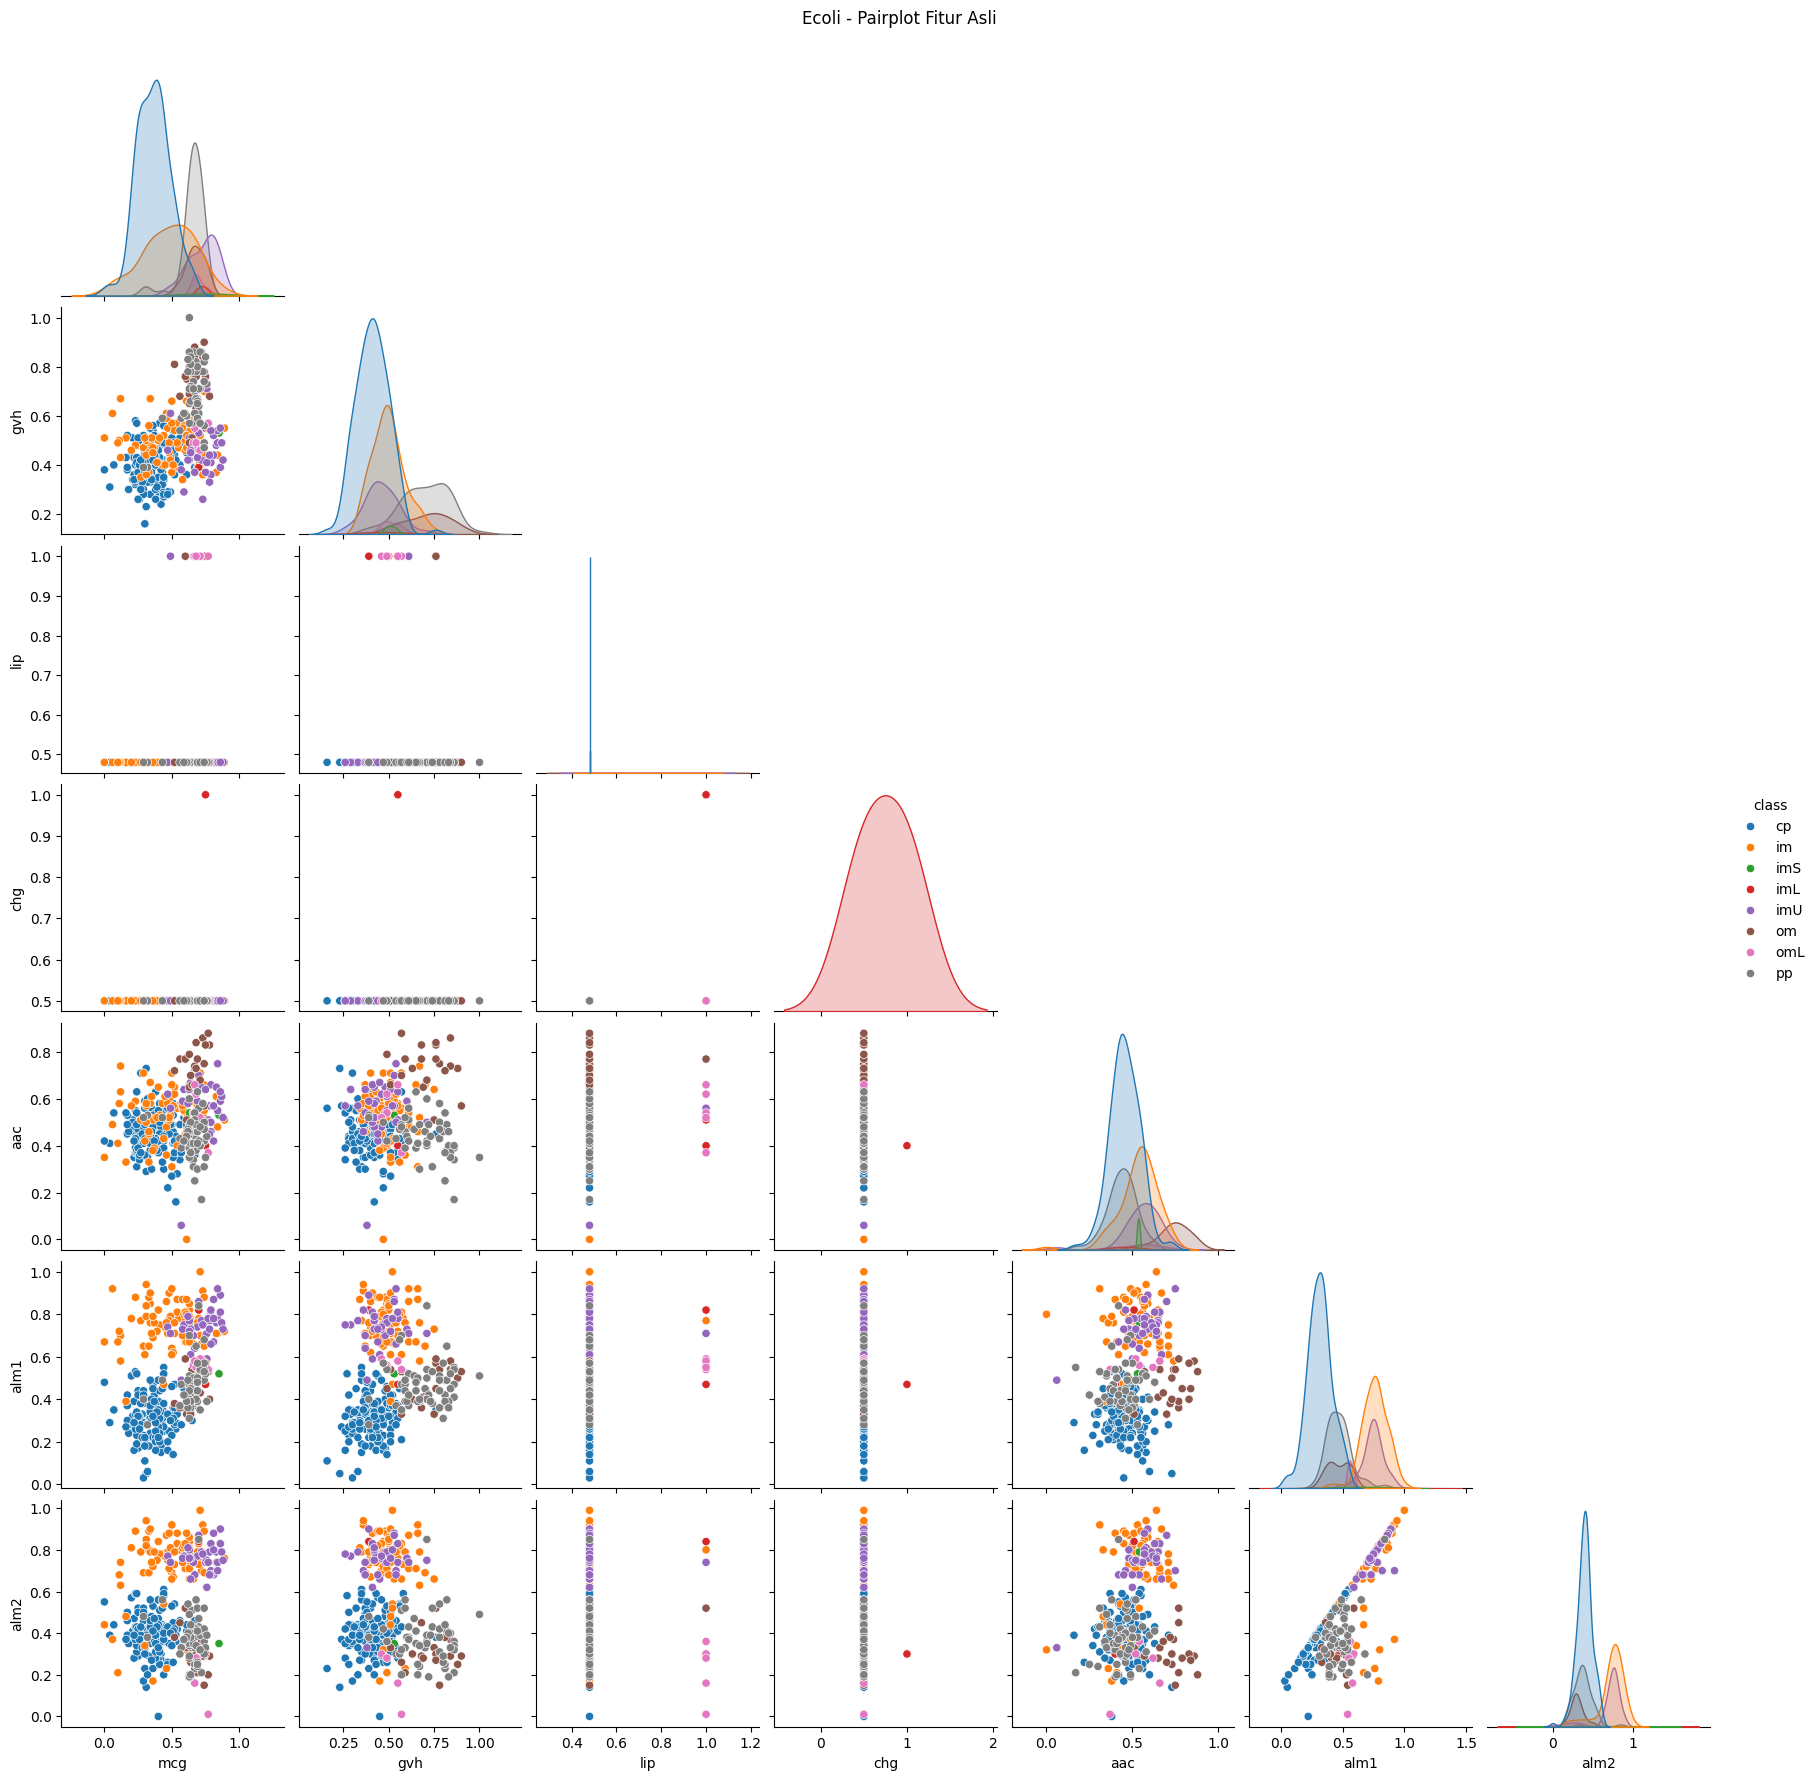

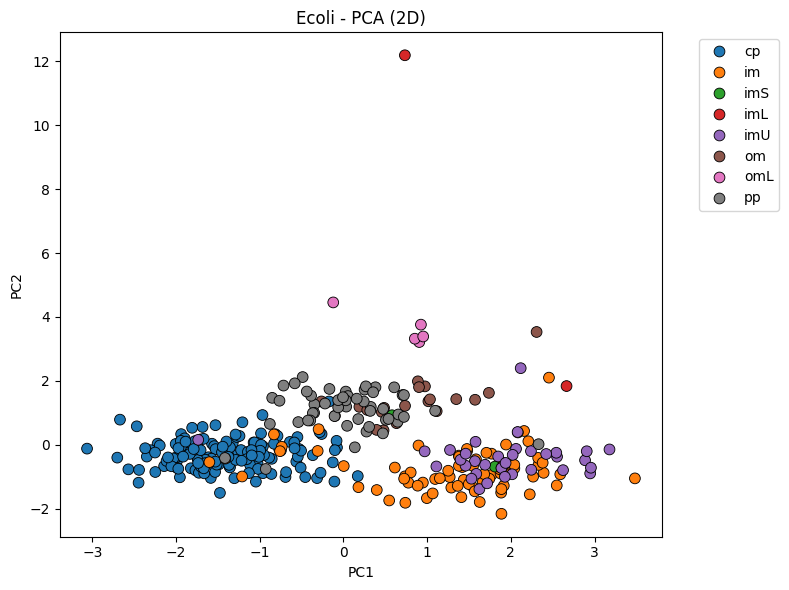

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ["mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2"]
X = df[features]
y = df["class"]

df_pair = X.copy()
df_pair["class"] = y
sns.pairplot(df_pair, hue="class", corner=True, diag_kind="kde", palette="tab10")
plt.suptitle("Ecoli - Pairplot Fitur Asli", y=1.02)
plt.show()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

df_plot = pd.DataFrame({
    "PC1": X_pca[:,0],
    "PC2": X_pca[:,1],
    "class": y
})

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_plot, x="PC1", y="PC2", hue="class", palette="tab10", s=60, edgecolor="k")
plt.title("Ecoli - PCA (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()


## Penyeimbangan Data

### SMOTE

Potongan kode ini berfungsi untuk menyeimbangkan kategori dalam dataset Ecoli menggunakan teknik SMOTE (Synthetic Minority Oversampling Technique). Pertama-tama, fitur numerik utama diambil sebagai X dan label kelas ditetapkan sebagai y. Kemudian, SMOTE diterapkan dengan k_neighbors=1 untuk mencegah kesalahan pada kelas dengan jumlah sampel yang sangat sedikit. Fungsi fit_resample dari SMOTE menghasilkan X_res dan y_res, yaitu dataset baru yang telah diseimbangkan sehingga setiap kelas memiliki jumlah sampel yang hampir setara. Kode ini juga menunjukkan jumlah sampel per kelas sebelum dan setelah proses penyeimbangan dengan menggunakan pd. Series. value_counts() yang memudahkan dalam memverifikasi hasil oversampling.

Selanjutnya, kode ini juga menandai sampel sintetis yang dihasilkan oleh SMOTE dengan cara membandingkan setiap baris dari X_res yang telah diresample dengan data asli X. Fungsi rows_to_keys digunakan untuk mengonversi setiap baris menjadi string yang unik berdasarkan nilai fitur yang sudah dibulatkan, sehingga dapat dibandingkan dengan akurat. Variabel is_synthetic menyimpan nilai boolean yang menunjukkan apakah baris tersebut adalah sampel yang dihasilkan oleh SMOTE (True) atau berasal dari data asli (False). Dengan cara ini, kita dapat mengetahui jumlah sampel baru yang ditambahkan, yang penting untuk visualisasi dan analisis lebih lanjut, misalnya ketika menampilkan scatter plot PCA dengan memberikan tanda pada data sintetis.

In [ ]:

from imblearn.over_sampling import SMOTE

features = ["mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2"]
X = df[features].values
y = df["class"].values

smote = SMOTE(random_state=42, k_neighbors=1)
X_res, y_res = smote.fit_resample(X, y)

print("Before balancing:", pd.Series(y).value_counts().to_dict())
print("After  balancing:", pd.Series(y_res).value_counts().to_dict())

# tandai synthetic samples
def rows_to_keys(arr):
    arr_rounded = np.round(arr.astype(float), 8)
    keys = ["|".join(map(str, row)) for row in arr_rounded]
    return np.array(keys)

orig_keys = rows_to_keys(X)
res_keys  = rows_to_keys(X_res)
orig_key_set = set(orig_keys.tolist())
is_synthetic = np.array([k not in orig_key_set for k in res_keys])

print("Jumlah sampel resampled:", len(X_res))
print("Jumlah synthetic terdeteksi:", is_synthetic.sum())


Before balancing: {'cp': 143, 'im': 77, 'pp': 52, 'imU': 35, 'om': 20, 'omL': 5, 'imL': 2, 'imS': 2}
After  balancing: {'cp': 143, 'im': 143, 'imS': 143, 'imL': 143, 'imU': 143, 'om': 143, 'omL': 143, 'pp': 143}
Jumlah sampel resampled: 1144
Jumlah synthetic terdeteksi: 808


### ADASYN

Potongan kode berikut menggambarkan metode kombinasi untuk menyeimbangkan dataset Ecoli yang memiliki kelas dengan jumlah sangat sedikit. Pertama, SMOTE diterapkan dengan `k_neighbors=1` untuk meningkatkan jumlah contoh dalam kelas-kelas yang jarang, sehingga semua kelas memiliki jumlah contoh minimal yang memadai. Hasil dari pengambilan sampel ini disimpan dalam `X_sm` dan `y_sm`, dan jumlah contoh per kelas ditampilkan menggunakan `pd. Series. value_counts()`, sehingga kita dapat melihat dampak penambahan contoh sintetis dari SMOTE.

Setelah kelas dengan jumlah sangat sedikit tersebut mendapatkan perwakilan yang cukup, diterapkan ADASYN pada dataset yang dihasilkan dari SMOTE. ADASYN juga menggunakan `n_neighbors=1` untuk menghindari kesalahan pada kelas minoritas yang kecil. Metode ini menambahkan contoh sintetis yang lebih adaptif berdasarkan distribusi kelas mayoritas di sekitar contoh minoritas. Hasil akhir disimpan dalam `X_ada` dan `y_ada`, dan jumlah contoh per kelas ditampilkan lagi. Dengan menggunakan metode gabungan ini, dataset menjadi lebih seimbang dan siap untuk dianalisis atau divisualisasikan lebih lanjut, misalnya dengan PCA untuk melihat distribusi contoh yang asli dan sintetis.


In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN

# 1. SMOTE dulu untuk mengatasi kelas ultra-minoritas
smote = SMOTE(random_state=42, k_neighbors=1)
X_sm, y_sm = smote.fit_resample(X_scaled, y)

print("Setelah SMOTE:", pd.Series(y_sm).value_counts().to_dict())

# 2. Baru jalankan ADASYN di hasil SMOTE
adasyn = ADASYN(random_state=42, n_neighbors=1)
X_ada, y_ada = adasyn.fit_resample(X_sm, y_sm)

print("Setelah SMOTE+ADASYN:", pd.Series(y_ada).value_counts().to_dict())


Setelah SMOTE: {'cp': 143, 'im': 143, 'imS': 143, 'imL': 143, 'imU': 143, 'om': 143, 'omL': 143, 'pp': 143}
Setelah SMOTE+ADASYN: {'cp': 143, 'im': 143, 'imS': 143, 'imL': 143, 'imU': 143, 'om': 143, 'omL': 143, 'pp': 143}


## Visualisasi data akhir

Potongan kode berikut menunjukkan cara penggabungan untuk menyeimbangkan dataset Ecoli yang memiliki kelas dengan jumlah yang sangat sedikit. Langkah awal adalah menerapkan SMOTE dengan `k_neighbors=1` untuk menambah jumlah contoh dalam kelas yang jarang, sehingga setiap kelas memiliki jumlah contoh minimal yang memadai. Hasil dari proses pengambilan sampel ini disimpan dalam `X_sm` dan `y_sm`, serta jumlah contoh untuk setiap kelas ditampilkan dengan menggunakan `pd. Series. value_counts()` agar kita bisa melihat efek dari penambahan contoh sintetis melalui SMOTE.

Setelah kelas dengan jumlah yang sangat sedikit memiliki representasi yang cukup, langkah selanjutnya adalah menerapkan ADASYN pada dataset yang telah dihasilkan dari SMOTE. ADASYN juga menggunakan `n_neighbors=1` untuk mencegah kesalahan pada kelas minoritas yang kecil. Metode ini menambah contoh sintetis yang lebih responsif sesuai dengan distribusi kelas mayoritas di sekitar contoh minoritas. Hasil akhirnya disimpan dalam `X_ada` dan `y_ada`, dan jumlah contoh per kelas ditampilkan kembali. Dengan menggunakan pendekatan kombinasi ini, dataset menjadi lebih seimbang dan siap untuk dianalisis atau divisualisasikan lebih lanjut, seperti dengan PCA untuk mengamati distribusi contoh yang asli dan sintetis.

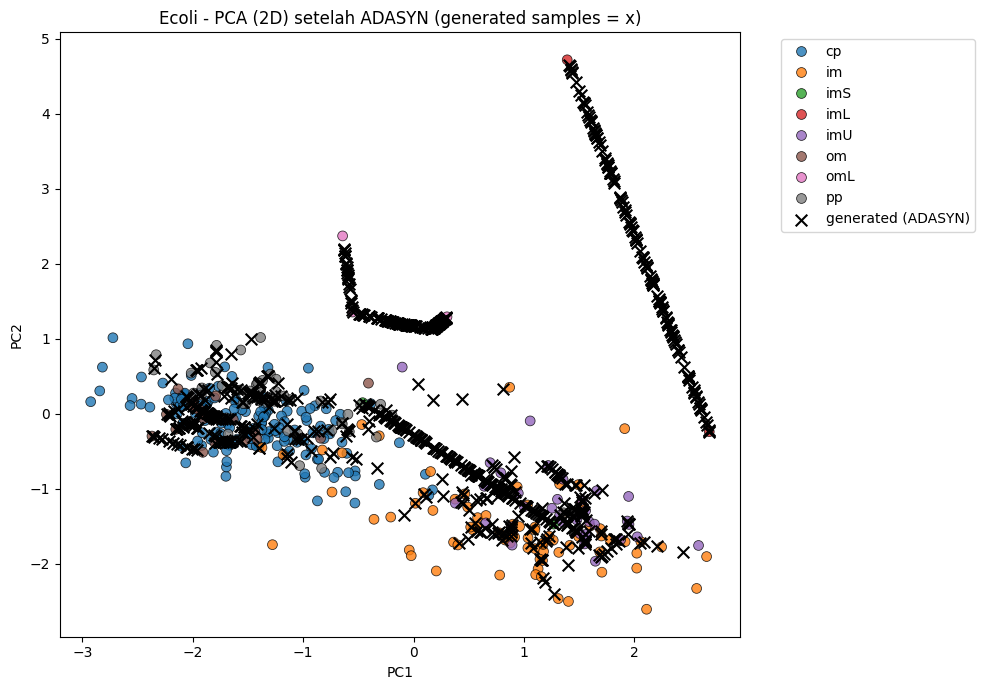

<Figure size 640x480 with 0 Axes>

In [ ]:

scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)

pca_res = PCA(n_components=2, random_state=42)
X_res_pca = pca_res.fit_transform(X_res_scaled)

df_res_plot = pd.DataFrame({
    "PC1": X_res_pca[:,0],
    "PC2": X_res_pca[:,1],
    "class": y_res,
    "is_synthetic": is_synthetic
})

plt.figure(figsize=(10,7))
# plot data asli
sns.scatterplot(data=df_res_plot[df_res_plot["is_synthetic"]==False],
                x="PC1", y="PC2", hue="class", palette="tab10",
                s=50, edgecolor="k", alpha=0.8)

# plot data synthetic
synthetic = df_res_plot[df_res_plot["is_synthetic"]==True]
plt.scatter(synthetic["PC1"], synthetic["PC2"],
            marker="x", s=70, c="black", label="generated (ADASYN)")

plt.title("Ecoli - PCA (2D) setelah ADASYN (generated samples = x)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()

# Optional: save plots
plt.savefig("ecoli_pca_original.png", dpi=200)
plt.savefig("ecoli_pca_adasyn.png", dpi=200)


Kode berikut digunakan untuk mempresentasikan dampak penyeimbangan kelas pada dataset Ecoli melalui tiga langkah: data awal, setelah penerapan SMOTE, dan setelah menggabungkan SMOTE dengan ADASYN. Pertama, fitur data dinormalisasi menggunakan `StandardScaler`, kemudian reduksi dimensi dilakukan dengan PCA menjadi dua komponen utama (`PC1` dan `PC2`). Fungsi `get_synthetic_mask` dibuat untuk mengidentifikasi sampel sintetis yang dihasilkan oleh teknik oversampling dengan cara membandingkan dataset hasil resampling dengan data asal. Data disimpan dalam DataFrame yang terpisah untuk setiap tahap, dengan kolom `is_synthetic` menandai sampel yang dihasilkan.

Untuk visualisasi, dibuat sebuah figure yang berisi tiga subplot. Scatter plot pertama menggambarkan distribusi data asli, yang diwarnai berdasarkan kelas. Plot kedua menggambarkan hasil dari SMOTE, di mana sampel asli tetap mempertahankan warna kelasnya dan sampel sintetis ditunjukkan dengan marker hitam berbentuk `x`. Plot ketiga menunjukkan hasil dari kombinasi SMOTE dan ADASYN dengan cara yang serupa. Dengan visualisasi ini, kita dapat melihat dengan jelas bagaimana sampel minoritas ditambahkan, bagaimana distribusi kelas menjadi lebih seimbang, serta dampak dari metode oversampling terhadap struktur data setelah dilakukan reduksi dengan PCA.

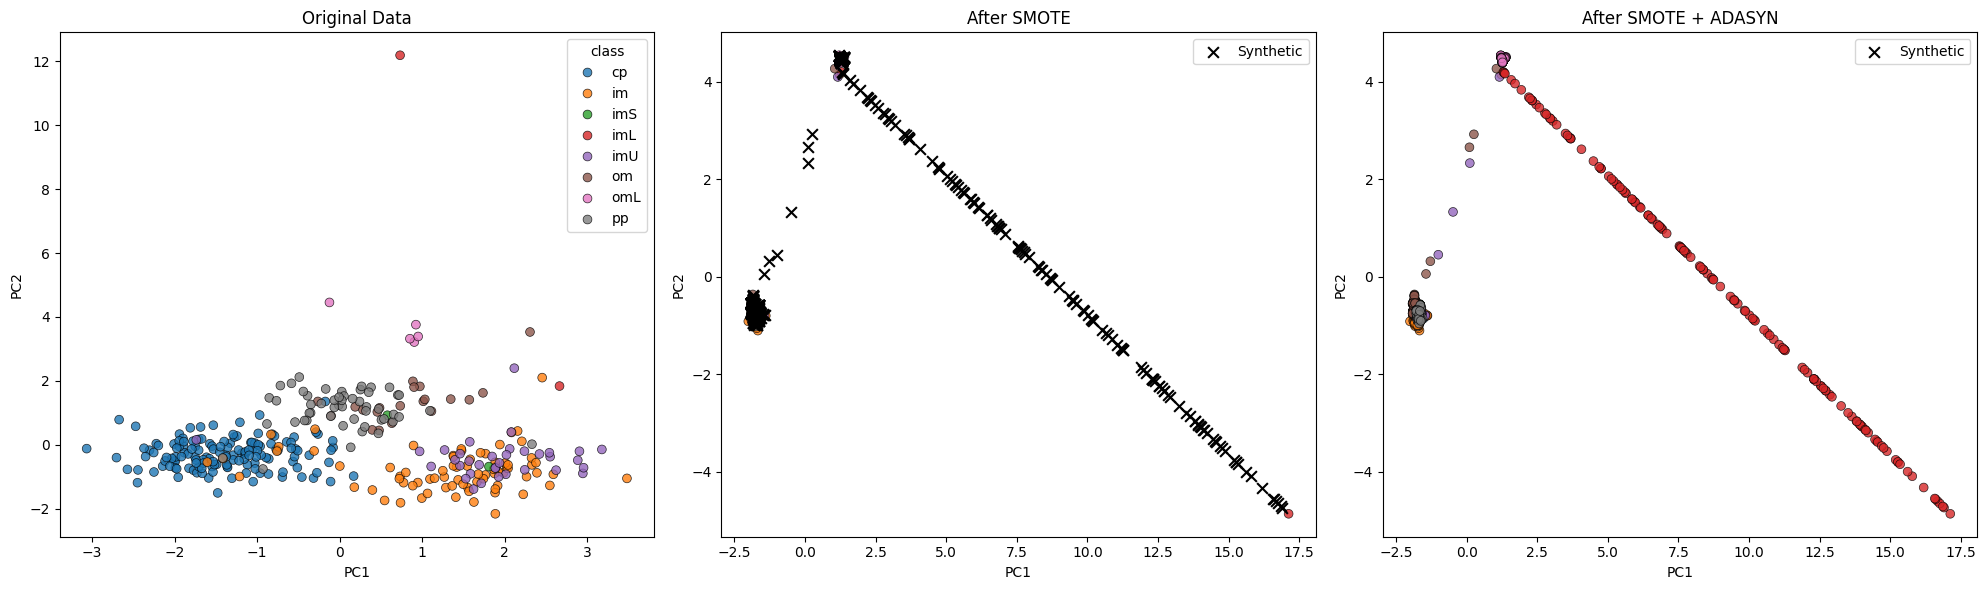

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
import numpy as np
import pandas as pd

features = ["mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2"]
X = df[features].values
y = df["class"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def get_synthetic_mask(X_orig, X_res):
    orig_keys = set(map(tuple, np.round(X_orig, 8)))
    res_keys  = list(map(tuple, np.round(X_res, 8)))
    return np.array([k not in orig_keys for k in res_keys])

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

df_orig = pd.DataFrame({
    "PC1": X_pca[:,0],
    "PC2": X_pca[:,1],
    "class": y,
    "is_synthetic": False
})

smote = SMOTE(random_state=42, k_neighbors=1)
X_sm, y_sm = smote.fit_resample(X_scaled, y)

mask_smote = get_synthetic_mask(X_scaled, X_sm)

X_sm_pca = pca.fit_transform(X_sm)
df_sm = pd.DataFrame({
    "PC1": X_sm_pca[:,0],
    "PC2": X_sm_pca[:,1],
    "class": y_sm,
    "is_synthetic": mask_smote
})

adasyn = ADASYN(random_state=42, n_neighbors=1)
X_ada, y_ada = adasyn.fit_resample(X_sm, y_sm)

mask_ada = get_synthetic_mask(X_sm, X_ada)

X_ada_pca = pca.fit_transform(X_ada)
df_ada = pd.DataFrame({
    "PC1": X_ada_pca[:,0],
    "PC2": X_ada_pca[:,1],
    "class": y_ada,
    "is_synthetic": mask_ada
})

fig, axes = plt.subplots(1, 3, figsize=(20,6))

# Original
sns.scatterplot(data=df_orig, x="PC1", y="PC2", hue="class",
                s=40, alpha=0.8, edgecolor="k", ax=axes[0])
axes[0].set_title("Original Data")

# SMOTE
sns.scatterplot(data=df_sm[df_sm["is_synthetic"]==False],
                x="PC1", y="PC2", hue="class",
                s=40, alpha=0.8, edgecolor="k", ax=axes[1], legend=False)
synthetic = df_sm[df_sm["is_synthetic"]==True]
axes[1].scatter(synthetic["PC1"], synthetic["PC2"],
                c="black", marker="x", s=60, label="Synthetic")
axes[1].set_title("After SMOTE")
axes[1].legend()

# SMOTE + ADASYN
sns.scatterplot(data=df_ada[df_ada["is_synthetic"]==False],
                x="PC1", y="PC2", hue="class",
                s=40, alpha=0.8, edgecolor="k", ax=axes[2], legend=False)
synthetic = df_ada[df_ada["is_synthetic"]==True]
axes[2].scatter(synthetic["PC1"], synthetic["PC2"],
                c="black", marker="x", s=60, label="Synthetic")
axes[2].set_title("After SMOTE + ADASYN")
axes[2].legend()

plt.tight_layout()
plt.show()
